In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import datasets,layers,models

In [3]:
import matplotlib.pyplot as plt 

In [4]:
import numpy as np 

In [6]:
#load datasets



In [7]:
(X_train,y_train),(X_test ,y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 629s 4us/step


In [8]:
X_train.shape

(50000, 32, 32, 3)

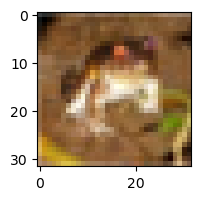

In [10]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[0])

In [11]:
y_train.shape

(50000, 1)

In [12]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [13]:
# reshape 

In [15]:
y_train=y_train.reshape(-1) # 10 thousand 
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [17]:
y_test=y_test.reshape(-1)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [18]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [21]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

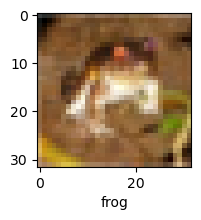

In [22]:
plot_sample(X_train,y_train,0)

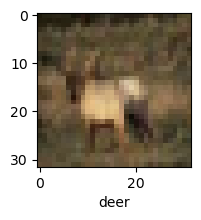

In [25]:
plot_sample(X_train,y_train,3)

In [26]:
# normaliing training data 

In [28]:
X_train=X_train/255.0
y_train=y_train/255.0

In [29]:
# model ann 

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.1004 - loss: 0.3736
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.0981 - loss: 0.0017
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.0992 - loss: 7.6956e-04
Epoch 4/10
 779/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.1018 - loss: 5.0629e-04

In [35]:
#cnn

In [48]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',# hyperperameter
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.0991 - loss: 0.1034
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.0990 - loss: 0.0000e+00
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.0993 - loss: 0.0000e+00
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.0999 - loss: 0.0000e+00
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.1005 - loss: 0.0000e+00
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.1005 - loss: 0.0000e+00
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.1000 - loss: 0.0000e+00
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.1009 - loss: 0.0000e+00
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.0996 - loss: 0.0000e+00
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.1003 - loss: 0.0000e+00


In [40]:
# 
32*32*3

3072

In [41]:
cnn.evaluate(X_test,y_test)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1001 - loss: 86930.4062


[86615.78125, 0.10000000149011612]

In [42]:
y_pred=cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [43]:
y_pred[:5]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [44]:
y_classes =[np.argmax(element)for element in y_pred]

In [45]:
y_classes[:5]

[0, 0, 0, 0, 0]

In [46]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)